In [1]:
import Graph
from Prims import run_prims
import Tree
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
"""
This method is called to generate a weighted graph of random
values. This graph is then plotted to show the vertices and 
the weights and show the fact that it isn't organized in any
particular order, other than the order it is generated in
"""
def generate_graph(x, y, ver):
    g = Graph.WeightedGraph.create_test_graph(x, y, ver)
    x_lst = []
    y_lst = []
    name_lst = []
    temp = 0
    
    for vertex in g._vertices:
        x_lst.append(vertex.x)
        y_lst.append(vertex.y)
        name_lst.append(vertex.name)
        temp += 1
        #Once two points are stored
        if(temp == 2):
            plt.scatter(x_lst, y_lst, color="Blue")
            plt.annotate(name_lst[0], (x_lst[0], y_lst[0]))
            plt.annotate(name_lst[1], (x_lst[1], y_lst[1]))
            plt.plot(x_lst, y_lst, color="Blue")
            #Midpoint used to display edge weight value
            x_mid = (x_lst[1]+x_lst[0])/2
            y_mid = (y_lst[1]+y_lst[0])/2
            plt.text(x_mid, y_mid, "test", color="Red")

            temp = 0
            x_lst.clear()
            y_lst.clear()
            name_lst.clear()

    plt.xlabel("Randomly Generated value for x-axis")
    plt.ylabel("Randomly Generated value for y-axis")
    plt.title("Unsorted Graph")
    plt.show() 
    return g      

In [3]:
"""
This method is used to create a minimum spanning tree (MST) using
Prims Algorithm. The graph generated by the generate_graph()
method is passed into this method to show how the unordered
graph from before is transformed into an MST.
"""

def make_prims_tree(g):
    t = run_prims(g, g.get_starting_vertex())
    nodes = t.get_connections()
    x_lst = []
    y_lst = []

    for node in nodes:
        x_lst.append(node[0].x)
        x_lst.append(node[1].x)
        y_lst.append(node[0].y)
        y_lst.append(node[1].y)
        #Plot each set of connected vertices 
        plt.scatter(x_lst, y_lst, color="Blue")
        plt.annotate(node[0].name, (x_lst[0], y_lst[0]))
        plt.annotate(node[1].name, (x_lst[1], y_lst[1]))
        plt.plot(x_lst, y_lst, color="Blue")
        #Midpoint used to display edge weight value
        x_mid = (x_lst[1]+x_lst[0])/2
        y_mid = (y_lst[1]+y_lst[0])/2
        plt.text(x_mid, y_mid, "test", color="Red")

        x_lst.clear()
        y_lst.clear()

    plt.xlabel("Randomly Generated value for x-axis")
    plt.ylabel("Randomly Generated value for y-axis")
    plt.title("MST Generated by Prims Algorithm")
    plt.show()

In [4]:
"""
This method is used to test the runtime of Prims Algorithm
by getting a randomly generated graph passed in and calculating 
the execution time of Prims Algorithm on this graph 5 times. These
times are then averaged and returned.
"""
def test_prims(g):
    n_trials = 5
    elapsed = []
    for runs in range(n_trials):
        start = time.clock()
        run_prims(g, g.get_starting_vertex())
        end = time.clock()
        elapsed.append((end-start))
    return (np.mean(elapsed))

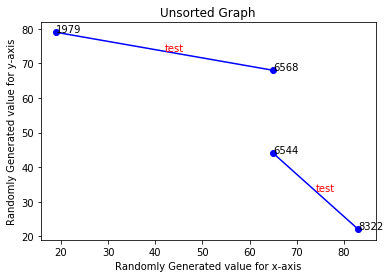

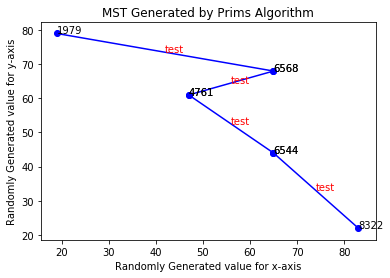

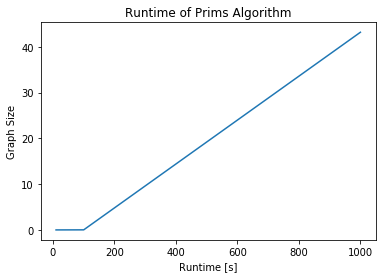

In [5]:
#Number of vertices a graph will have 
trial_size = [10, 100, 1000]
#The range of x and y values a vertex can be randomly generated between
x = 100
y = 100

#Called to generate a test graph top be displayed
g = generate_graph(x, y, 5)
#Test graph gets passed in to show that Prims works properly
make_prims_tree(g)
#Stores results from runtime test
results = []

for length in trial_size:
    g = Graph.WeightedGraph.create_test_graph(x, y, length)
    results.append(test_prims(g))

plt.plot(trial_size, results)
plt.xlabel("Runtime [s]")
plt.ylabel("Graph Size")
plt.title("Runtime of Prims Algorithm")
plt.show()

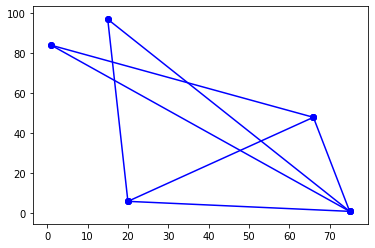

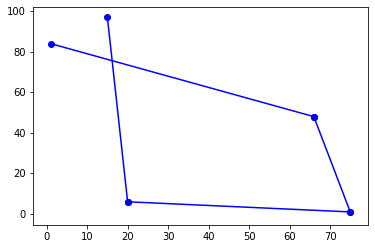

In [4]:
#Quick demo of new features:

g = Graph.WeightedGraph.create_test_graph(100,100,5)
x_lst = []
y_lst = []
# Now a get_connections() method for graph that formally shows all the proper vertex connections
for connection in g.get_connections():
    x_lst.append(connection[0].x)
    y_lst.append(connection[0].y)
    x_lst.append(connection[1].x)
    y_lst.append(connection[1].y)
    # connection[2] contains distance.
    plt.scatter(x_lst, y_lst, color="Blue")
    plt.plot(x_lst, y_lst, color="Blue")
    x_lst.clear()
    y_lst.clear()
plt.show()

t = run_prims(g, g.get_starting_vertex())
for connection in t.get_connections():
    x_lst.append(connection[0].x)
    y_lst.append(connection[0].y)
    x_lst.append(connection[1].x)
    y_lst.append(connection[1].y)
    #connection[2] contains distance
    plt.scatter(x_lst, y_lst, color="Blue")
    plt.plot(x_lst, y_lst, color="Blue")
    x_lst.clear()
    y_lst.clear()
plt.show()
    